In [73]:
from time import process_time

import requests
from matplotlib.pyplot import figure, title

!pip install requests

In [74]:
import requests
import pandas as pd

url = "https://api.data.gov.in/resource/9ef84268-d588-465a-a308-a864a43d0070?api-key=579b464db66ec23bdd000001cdd3946e44ce4aad7209ff7b23ac571b&format=xml"

params = {
    "api-key": "579b464db66ec23bdd000001cdd3946e44ce4aad7209ff7b23ac571b",  # correct key name
    "format": "json",
    "limit": 10# integer, not string
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    records = data.get("records", [])
    df = pd.DataFrame(records)

    print("✅ Total records fetched:", len(df))
    print(df)

    # Save to CSV
    df.to_csv("mandi_prices.csv", index=False)
    print("✅ Data saved to mandi_prices.csv")

else:
    print("❌ Error:", response.status_code)


✅ Total records fetched: 10
            state       district                 market  \
0  Andhra Pradesh         Guntur    Pidugurala(Palnadu)   
1  Andhra Pradesh  West Godavari           Chintalapudi   
2         Gujarat         Amreli               Damnagar   
3         Gujarat        Bharuch                Bharuch   
4         Gujarat        Bharuch                Bharuch   
5         Gujarat        Bharuch                Bharuch   
6         Gujarat        Bharuch               Jambusar   
7         Gujarat        Bharuch               Jambusar   
8         Gujarat    Gandhinagar  Mansa(Manas Veg Yard)   
9         Gujarat    Gandhinagar  Mansa(Manas Veg Yard)   

               commodity variety grade arrival_date min_price max_price  \
0           Dry Chillies     Red   FAQ   06/11/2025     11500     15400   
1                  Lemon   Lemon   FAQ   06/11/2025       700       900   
2  Bhindi(Ladies Finger)  Bhindi   FAQ   06/11/2025      1650      2550   
3            Cauliflow

In [75]:
df.shape


(10, 10)

In [76]:
df.isnull()


,state,district,market,commodity,variety,grade,arrival_date,min_price,max_price,modal_price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [77]:
df.dropna(inplace=True)



In [78]:
df.drop_duplicates(inplace=True)


In [79]:
df.describe()


,state,district,market,commodity,variety,grade,arrival_date,min_price,max_price,modal_price
count,10,10,10,10,10,10,10,10,10,10
unique,2,5,6,9,5,1,1,9,9,9
top,Gujarat,Bharuch,Bharuch,Lemon,Other,FAQ,06/11/2025,2000,3000,2000
freq,8,5,3,2,6,10,10,2,2,2


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

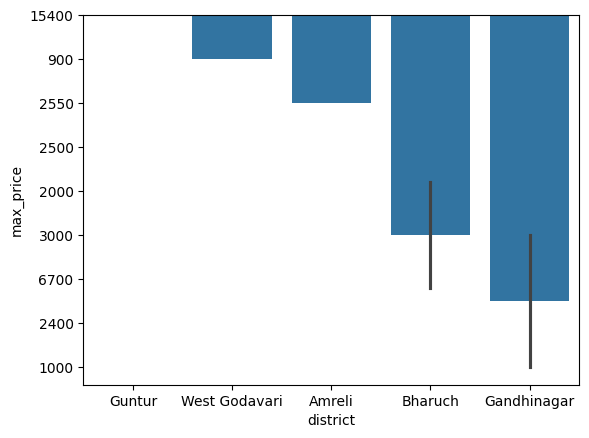

In [81]:
sns.barplot(x=df['district'], y=df['max_price'])
plt.show()

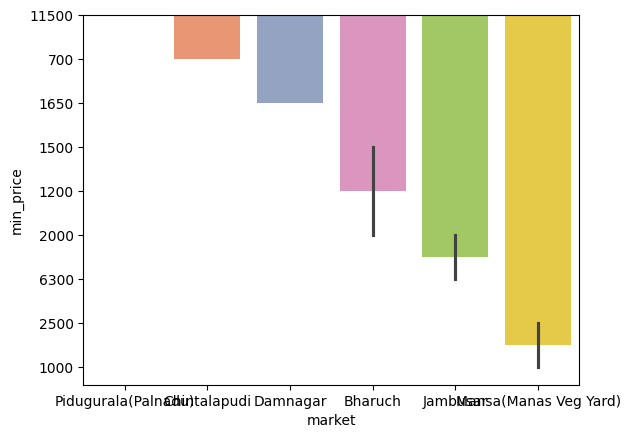

In [82]:
sns.barplot(x=df['market'], y=df['min_price'],hue=df['market'], palette="Set2", ax=plt.gca())
plt.show()


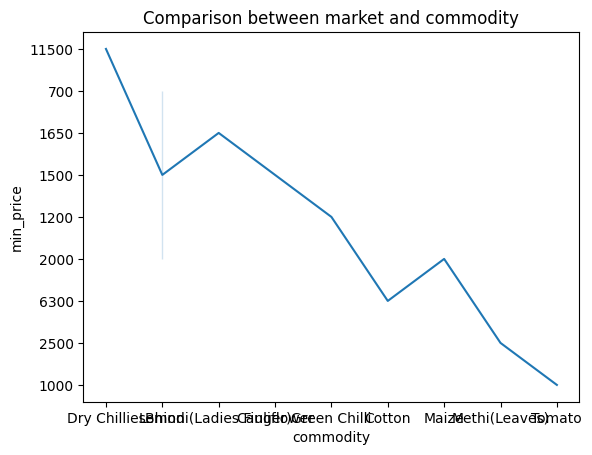

In [83]:
sns.lineplot(x=df['commodity'], y=df['min_price'])
plt.title('Comparison between market and commodity')
plt.show()

In [84]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)


Index(['state', 'district', 'market', 'commodity', 'variety', 'grade',
       'arrival_date', 'min_price', 'max_price', 'modal_price'],
      dtype='object')


Text(0.5, 1.0, 'Comparison between state and variety')

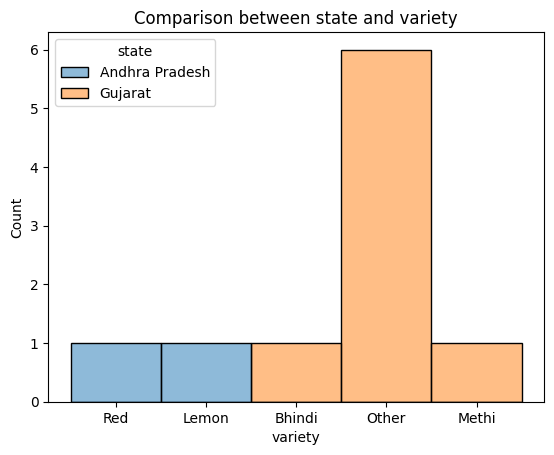

In [85]:
sns.histplot(x='variety', hue='state', data=df)
plt.title('Comparison between state and variety')

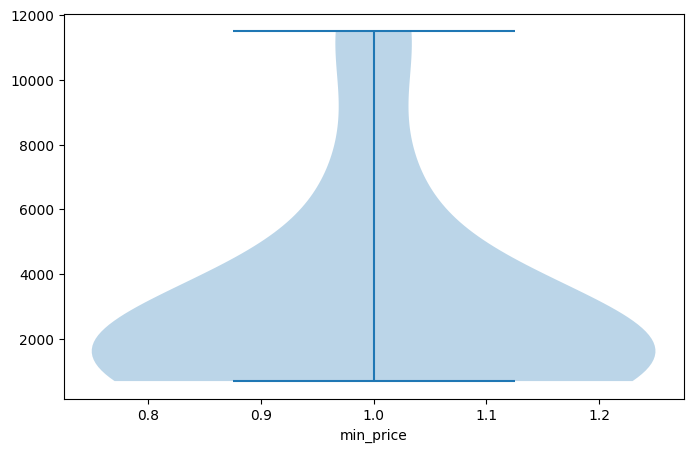

In [86]:
df['min_price'] = pd.to_numeric(df['min_price'], errors='coerce')


plt.figure(figsize=[8,5])
plt.violinplot(df['min_price'])
plt.xlabel('min_price')
plt.show()


In [87]:
pd.crosstab(df['commodity'], df['state'])


state,Andhra Pradesh,Gujarat
commodity,,
Bhindi(Ladies Finger),0,1
Cauliflower,0,1
Cotton,0,1
Dry Chillies,1,0
Green Chilli,0,1
Lemon,1,1
Maize,0,1
Methi(Leaves),0,1
Tomato,0,1


In [88]:
df['min_price'] = (
    df['min_price']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('₹', '', regex=False)
    .str.extract(r'(\d+)', expand=False)   # <-- use r'' for regex strings
)
df['min_price'] = pd.to_numeric(df['min_price'], errors='coerce')

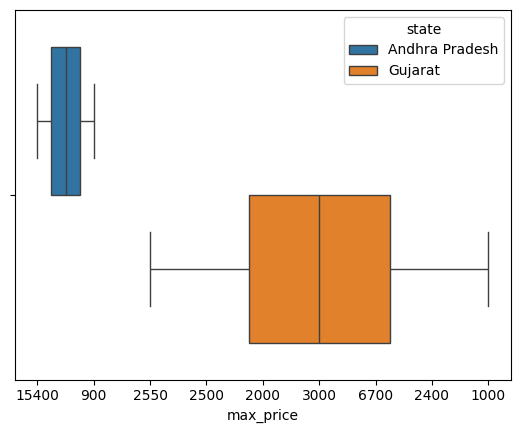

In [89]:
sns.boxplot(x='max_price', hue='state', data=df)
plt.show()

In [95]:
df['district']
df['market']
df['commodity']


0             Dry Chillies
1                    Lemon
2    Bhindi(Ladies Finger)
3              Cauliflower
4             Green Chilli
5                    Lemon
6                   Cotton
7                    Maize
8            Methi(Leaves)
9                   Tomato
Name: commodity, dtype: object

In [98]:
import pandas as pd
from sqlalchemy import create_engine
import urllib

# -----------------------------
# SQL Server connection details
# -----------------------------
server = r"DESKTOP-GE794C3\SQLEXPRESS"  # Your named instance
database = "agrofinance_db"             # Replace with your actual database name

# Create connection string using Windows Authentication
params = urllib.parse.quote_plus(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};DATABASE={database};Trusted_Connection=yes;"
)

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

# -----------------------------
# Actual DataFrame with 10 records
# -----------------------------
data = {
    'state': [
        'Andhra Pradesh', 'Andhra Pradesh', 'Gujarat', 'Gujarat', 'Gujarat',
        'Gujarat', 'Gujarat', 'Gujarat', 'Gujarat', 'Gujarat'
    ],
    'district': [
        'Guntur', 'West Godavari', 'Amreli', 'Bharuch', 'Bharuch',
        'Bharuch', 'Bharuch', 'Bharuch', 'Gandhinagar', 'Gandhinagar'
    ],
    'market': [
        'Pidugurala(Palnadu)', 'Chintalapudi', 'Damnagar', 'Bharuch', 'Bharuch',
        'Bharuch', 'Jambusar', 'Jambusar', 'Mansa(Manas Veg Yard)', 'Mansa(Manas Veg Yard)'
    ],
    'commodity': [
        'Dry Chillies', 'Lemon', 'Bhindi(Ladies Finger)', 'Cauliflower', 'Green Chilli',
        'Lemon', 'Cotton', 'Maize', 'Methi(Leaves)', 'Tomato'
    ],
    'variety': [
        'Red', 'Lemon', 'Bhindi', 'Other', 'Other',
        'Other', 'Other', 'Other', 'Methi', 'Other'
    ],
    'grade': ['FAQ']*10,
    'arrival_date': [
        '06/11/2025', '06/11/2025', '06/11/2025', '06/11/2025', '06/11/2025',
        '06/11/2025', '06/11/2025', '06/11/2025', '06/11/2025', '06/11/2025'
    ],
    'min_price': [11500, 700, 1650, 1500, 1200, 2000, 6300, 2000, 2500, 1000],
    'max_price': [15400, 900, 2550, 2500, 2000, 3000, 6700, 2400, 3000, 1000],
    'modal_price': [13500, 800, 2100, 2000, 1600, 2500, 6500, 2200, 3000, 1000]
}

df = pd.DataFrame(data)

# Optional: Convert arrival_date to datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date'], dayfirst=True, errors='coerce')

# -----------------------------
# Write DataFrame to SQL Server
# -----------------------------
try:
    df.to_sql('mandi_prices', con=engine, if_exists='replace', index=False)
    print("✅ DataFrame written to SQL Server successfully!")
except Exception as e:
    print("❌ Failed to write to SQL Server:", e)


✅ DataFrame written to SQL Server successfully!


In [99]:
df.to_sql('mandi_prices', con=engine, if_exists='replace', index=False)


10

In [93]:
# Suppose you already have your actual DataFrame
# df = pd.read_csv("mandi_prices.csv")  # or however you loaded it

# Then write it to SQL Server
# df.to_sql('mandi_price', con=engine, if_exists='replace', index=False)
